# Class: ALY 6040, Data Mining Applicatuons
# Project name: **binary classification** with the **Spaceship Titanic** dataset.

 The objective is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with a spacetime anomaly.


# Libraries

In [1]:
# Core packages for fundamental functionalities
import numpy as np                           # Numerical computing library
import pandas as pd                          # Data manipulation and analysis library
import matplotlib.pyplot as plt              # Plotting library
%matplotlib inline                           # Display plots inline within Jupyter Notebook
import seaborn as sns                        # Data visualization library based on matplotlib

# Package for dealing with imbalanced datasets
from imblearn.over_sampling import SMOTE    # Synthetic Minority Over-sampling Technique for balancing classes

import itertools                            # Functions for efficient looping and combination generation

import warnings                             # Library for handling warnings
warnings.filterwarnings('ignore')           # Ignore warnings during execution

import plotly.express as px                 # Library for creating interactive plots

import time                                 # Time-related functions

# Sklearn: machine learning library
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import eli5                                  # Library for debugging and understanding ML models
from eli5.sklearn import PermutationImportance
from sklearn.utils import resample           # Utility functions for resampling datasets

# Models: Various machine learning algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB   # Naive Bayes classifier for classification tasks


UsageError: unrecognized arguments: # Display plots inline within Jupyter Notebook


In [2]:
# Data

In [3]:
# Save datasets to dataframes
train = pd.read_csv('~/ALY6040/github/train.csv')   # Load training data from CSV file
test = pd.read_csv('/ALY6040/github//test.csv')     # Load testing data from CSV file

# Display shape and preview of datasets
print('Train set shape:', train.shape)              # Print shape of training dataset
print('Test set shape:', test.shape)                # Print shape of testing dataset
train.head()                                        # Display first few rows of training dataset


Train set shape: (8693, 14)
Test set shape: (4277, 13)


PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

*Feature descriptions:*
> * **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
> * **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
> * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
> * **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
> * **Destination** - The planet the passenger will be debarking to.
> * **Age** - The age of the passenger.
> * **VIP** - Whether the passenger has paid for special VIP service during the voyage.
> * **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
> * **Name** - The first and last names of the passenger.
> * **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# Missing values

In [4]:
# Print header for train set missing values
print('TRAIN SET MISSING VALUES:')
# Print the count of missing values for each column in the train set
print(train.isna().sum())  

# Print an empty line for separation
print('')

# Print header for test set missing values
print('TEST SET MISSING VALUES:')
# Print the count of missing values for each column in the test set
print(test.isna().sum())   


TRAIN SET MISSING VALUES:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

TEST SET MISSING VALUES:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [5]:
# Almost every feature has missing values! How we deal with these values will be very important.

In [6]:
# Duplicates

In [5]:
# Check for duplicates in the train set
train_duplicates = train.duplicated().sum()                           # Count the number of duplicates in the train set
train_duplicates_percentage = np.round(100 * train_duplicates / len(train), 1)  # Calculate the percentage of duplicates in the train set
print(f'Duplicates in train set: {train_duplicates}, ({train_duplicates_percentage}%)')  # Print the count and percentage of duplicates in the train set
print('')

# Check for duplicates in the test set
test_duplicates = test.duplicated().sum()                             # Count the number of duplicates in the test set
test_duplicates_percentage = np.round(100 * test_duplicates / len(test), 1)   # Calculate the percentage of duplicates in the test set
print(f'Duplicates in test set: {test_duplicates}, ({test_duplicates_percentage}%)')   # Print the count and percentage of duplicates in the test set


Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


# Cardinality of features
# There are 6 continuous features, 4 categorical features (excluding the target) and 3 descriptive/qualitative features

In [8]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

Data types

In [9]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

We will need to transform the data to be numeric (int64 or float64) so that we can train machine learning models. These models (in general) don't work on text.

EDA
Let us explore the dataset to gain insights.

Target distribution

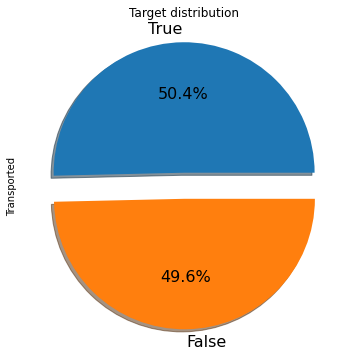

In [6]:
# Set the size of the figure
plt.figure(figsize=(6,6))

# Create a pie plot to show the distribution of the 'Transported' column
# 'explode' parameter is used to separate the slices of the pie chart
# 'autopct' parameter adds percentage labels to each slice with 1 decimal place
# 'shadow' parameter adds a shadow effect to the pie chart
# 'textprops' parameter sets the font size of the text in the pie chart
train['Transported'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16})

# Set the title of the pie chart
plt.title("Target distribution")

# Display the pie chart
plt.show()


The target is highly balanced, so we luckily don't have to consider techniques like under/over-sampling.

Continuous features

Text(0.5, 0, 'Age (years)')

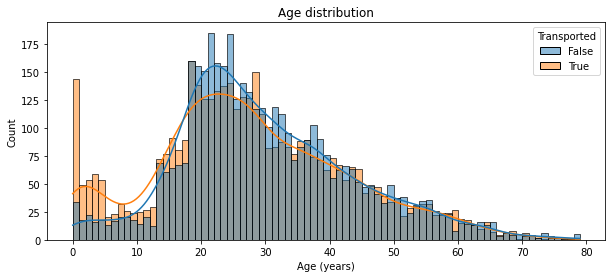

In [10]:
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(10, 4))

# Create a histogram using seaborn's histplot function
# 'data' specifies the DataFrame to use
# 'x' specifies the column to use for the x-axis (Age)
# 'hue' separates the data by the 'Transported' column
# 'binwidth' sets the width of the bins in the histogram
# 'kde' adds a kernel density estimation plot on top of the histogram
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Add title to the plot
plt.title('Age distribution')

# Label the x-axis
plt.xlabel('Age (years)')


*Insights:*
* 0-18 year olds were **more** likely to be transported than not.
* 18-25 year olds were **less** likely to be transported than not.
* Over 25 year olds were about **equally** likely to be transported than not.
* Create a new feature that indicates whether the passanger is a child, adolescent or adult.

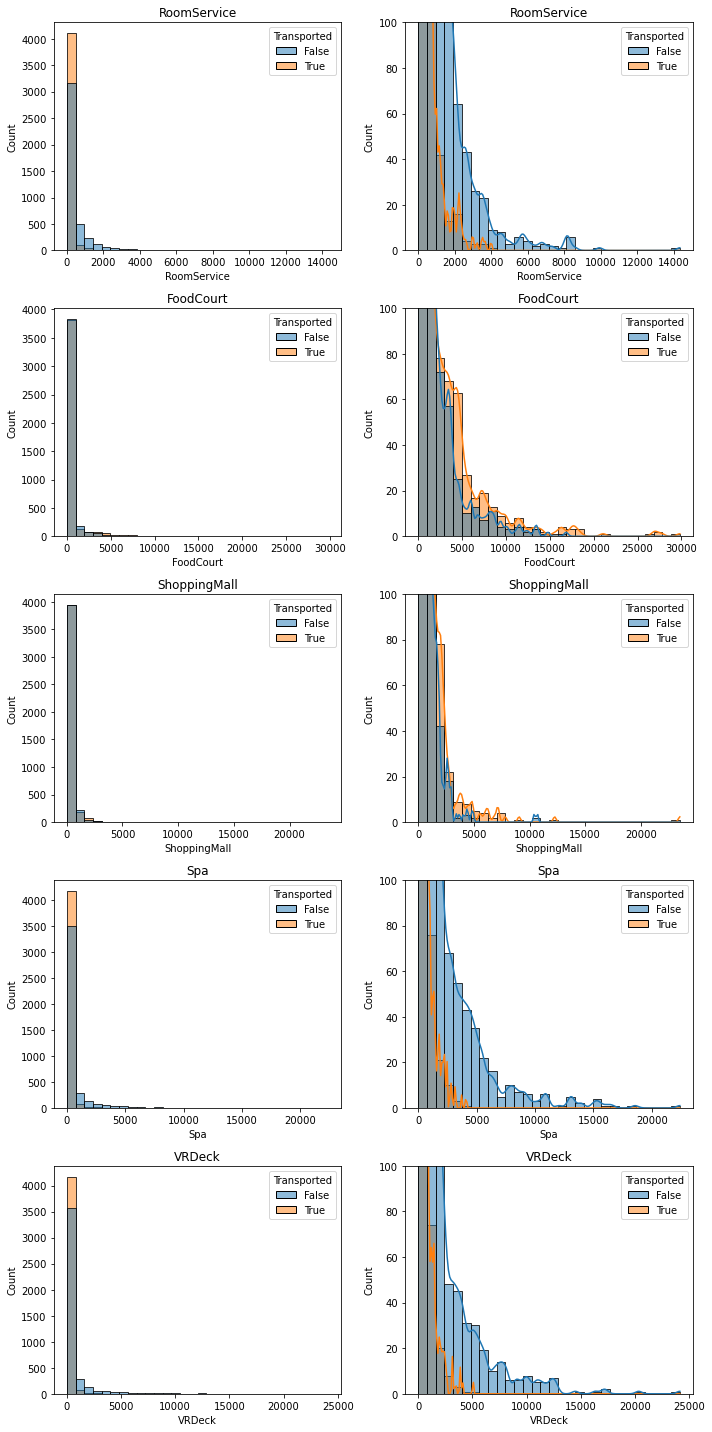

In [11]:
# Expenditure features to plot
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Create a figure to hold the subplots
fig = plt.figure(figsize=(10, 20))

# Loop through each expenditure feature
for i, var_name in enumerate(exp_feats):
    # Left plot (without KDE)
    ax = fig.add_subplot(5, 2, 2*i+1)
    # Create a histogram without kernel density estimation (KDE)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)  # Set the title of the subplot
    
    # Right plot (with KDE)
    ax = fig.add_subplot(5, 2, 2*i+2)
    # Create a histogram with kernel density estimation (KDE)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0, 100])  # Limit the y-axis for better visualization
    ax.set_title(var_name)  # Set the title of the subplot

# Adjust layout to improve appearance
fig.tight_layout()

# Show the plot
plt.show()


*Insights:*
* Most people don't spend any money (as we can see on the left).
* The distribution of spending decays exponentially (as we can see on the right).
* There are a small number of outliers.
* People who were transported tended to spend less.
* RoomService, Spa and VRDeck have different distributions to FoodCourt and ShoppingMall - we can think of this as luxury vs essential amenities. 
* Create a new feature that tracks the total expenditure across all 5 amenities.
* Create a binary feature to indicate if the person has not spent anything. (i.e. total expenditure is 0).
* Take the log transform to reduce skew.

Categorical features

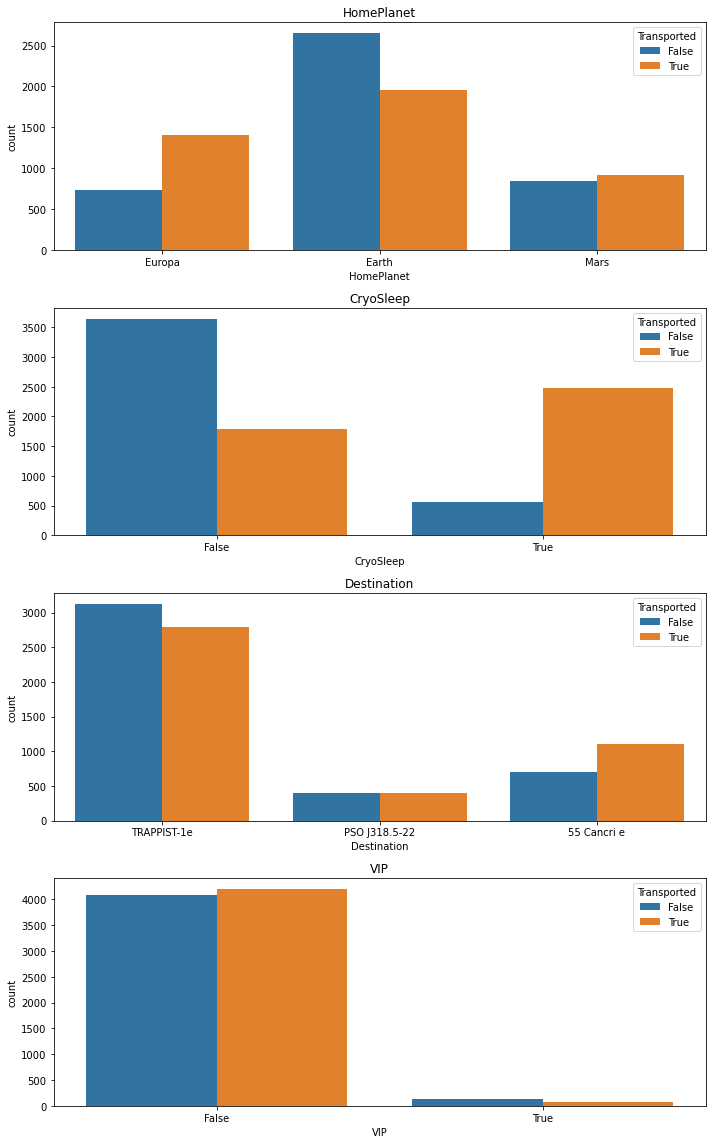

In [12]:
# Categorical features to plot
cat_feats = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Create a figure to hold the subplots
fig = plt.figure(figsize=(10, 16))

# Loop through each categorical feature
for i, var_name in enumerate(cat_feats):
    # Add a subplot to the figure
    ax = fig.add_subplot(4, 1, i+1)
    # Create a countplot for the current categorical feature
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    # Set the title of the subplot
    ax.set_title(var_name)

# Adjust layout to improve appearance
fig.tight_layout()

# Show the plot
plt.show()


*Insights:*
* VIP does not appear to be a useful feature; the target split is more or less equal. 
* CryoSleep appears the be a very useful feature in contrast.
* We might consider dropping the VIP column to prevent overfitting.

# Qualitative features

In [13]:
# Qualitative features to preview
qual_feats = ['PassengerId', 'Cabin', 'Name']

# Preview the first few rows of the qualitative features in the train dataset
train[qual_feats].head()


PassengerId  Cabin               Name
0     0001_01  B/0/P    Maham Ofracculy
1     0002_01  F/0/S       Juanna Vines
2     0003_01  A/0/S      Altark Susent
3     0003_02  A/0/S       Solam Susent
4     0004_01  F/1/S  Willy Santantines

*Insights:*
* PassengerId takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group.
* Cabin takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* We can extract the group and group size from the PassengerId feature. 
* We can extract the deck, number and side from the cabin feature. 
* We could extract the surname from the name feature to identify families. 

# Feature engineering

The philosophy to feature engineering is simple. Better features make better models.

Age status

Bin age feature into groups. This will be helpful for filling missing values like expenditure according to age.

Text(0.5, 1.0, 'Age group distribution')

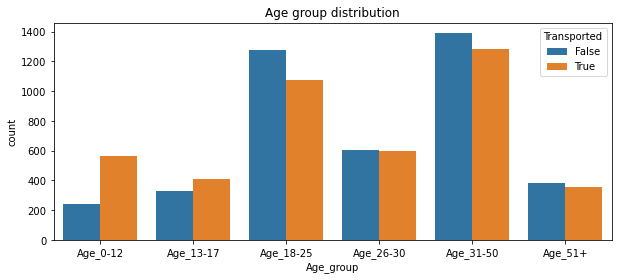

In [14]:
# New feature creation - training set
train['Age_group'] = np.nan  # Create a new column 'Age_group' filled with NaN values
# Assign age groups based on age ranges
train.loc[train['Age'] <= 12, 'Age_group'] = 'Age_0-12'
train.loc[(train['Age'] > 12) & (train['Age'] < 18), 'Age_group'] = 'Age_13-17'
train.loc[(train['Age'] >= 18) & (train['Age'] <= 25), 'Age_group'] = 'Age_18-25'
train.loc[(train['Age'] > 25) & (train['Age'] <= 30), 'Age_group'] = 'Age_26-30'
train.loc[(train['Age'] > 30) & (train['Age'] <= 50), 'Age_group'] = 'Age_31-50'
train.loc[train['Age'] > 50, 'Age_group'] = 'Age_51+'

# New feature creation - test set
test['Age_group'] = np.nan  # Create a new column 'Age_group' filled with NaN values
# Assign age groups based on age ranges
test.loc[test['Age'] <= 12, 'Age_group'] = 'Age_0-12'
test.loc[(test['Age'] > 12) & (test['Age'] < 18), 'Age_group'] = 'Age_13-17'
test.loc[(test['Age'] >= 18) & (test['Age'] <= 25), 'Age_group'] = 'Age_18-25'
test.loc[(test['Age'] > 25) & (test['Age'] <= 30), 'Age_group'] = 'Age_26-30'
test.loc[(test['Age'] > 30) & (test['Age'] <= 50), 'Age_group'] = 'Age_31-50'
test.loc[test['Age'] > 50, 'Age_group'] = 'Age_51+'

# Plot distribution of new features
plt.figure(figsize=(10, 4))  # Set the size of the figure
# Create a countplot to show the distribution of 'Age_group' with respect to 'Transported'
g = sns.countplot(data=train, x='Age_group', hue='Transported', order=['Age_0-12', 'Age_13-17', 'Age_18-25', 'Age_26-30', 'Age_31-50', 'Age_51+'])
plt.title('Age group distribution')  # Set the title of the plot


Expenditure

Calculate total expenditure and identify passengers with no expenditure.

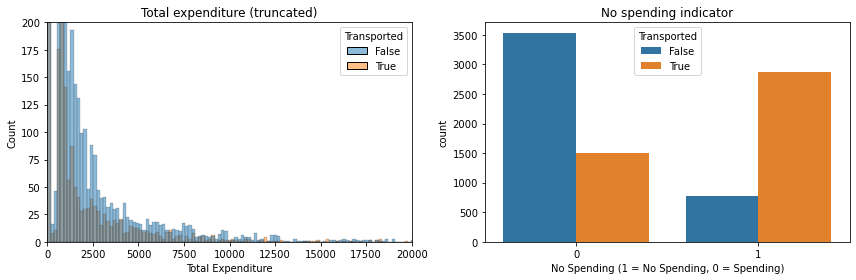

In [15]:
# New feature creation - training set
train['Expenditure'] = train[exp_feats].sum(axis=1)  # Calculate the total expenditure by summing expenditure features
train['No_spending'] = (train['Expenditure'] == 0).astype(int)  # Create a binary indicator for no spending

# New feature creation - test set
test['Expenditure'] = test[exp_feats].sum(axis=1)  # Calculate the total expenditure by summing expenditure features
test['No_spending'] = (test['Expenditure'] == 0).astype(int)  # Create a binary indicator for no spending

# Plot distribution of new features
fig = plt.figure(figsize=(12, 4))  # Set the size of the figure

# Plot total expenditure distribution (truncated)
plt.subplot(1, 2, 1)  # Create a subplot for the first plot
sns.histplot(data=train, x='Expenditure', hue='Transported', bins=200)  # Create a histogram of total expenditure
plt.title('Total expenditure (truncated)')  # Set the title of the subplot
plt.ylim([0, 200])  # Limit the y-axis for better visualization
plt.xlim([0, 20000])  # Limit the x-axis for better visualization
plt.xlabel('Total Expenditure')  # Set the x-axis label

# Plot no spending indicator
plt.subplot(1, 2, 2)  # Create a subplot for the second plot
sns.countplot(data=train, x='No_spending', hue='Transported')  # Create a countplot of no spending indicator
plt.title('No spending indicator')  # Set the title of the subplot
plt.xlabel('No Spending (1 = No Spending, 0 = Spending)')  # Set the x-axis label

fig.tight_layout()  # Adjust layout to improve appearance


Passenger group

Extract passenger group and group size from PassengerId.

C:\Users\rsrin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


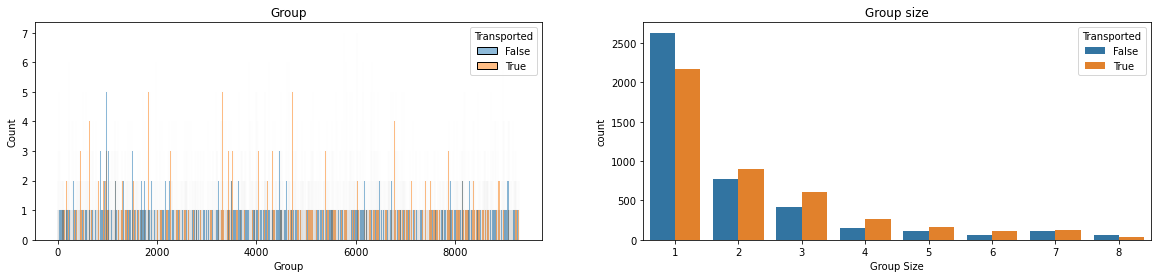

In [16]:
# New feature - Group
# Extract group information from 'PassengerId' and convert to integer
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

# New feature - Group size
# Calculate group size by counting occurrences of each group
train['Group_size'] = train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['Group_size'] = test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

# Plot distribution of new features
plt.figure(figsize=(20, 4))  # Set the size of the figure

# Plot distribution of 'Group'
plt.subplot(1, 2, 1)  # Create a subplot for the first plot
sns.histplot(data=train, x='Group', hue='Transported', binwidth=1)  # Create a histogram of 'Group'
plt.title('Group')  # Set the title of the subplot
plt.xlabel('Group')  # Set the x-axis label

# Plot distribution of 'Group_size'
plt.subplot(1, 2, 2)  # Create a subplot for the second plot
sns.countplot(data=train, x='Group_size', hue='Transported')  # Create a countplot of 'Group_size'
plt.title('Group size')  # Set the title of the subplot
plt.xlabel('Group Size')  # Set the x-axis label

fig.tight_layout()  # Adjust layout to improve appearance


Because the Group feature has an excessively high cardinality (6217) and would drastically increase the number of dimensions using one-hot encoding, we are unable to include it in our models.

On the other side, the Group size feature ought to be handy. In fact, by adding a "Solo" column that tracks whether a person is traveling alone or not, we may reduce the feature even more. The right figure demonstrates that groups of one are less likely to be transferred than groups of more than one.

(0.0, 3000.0)

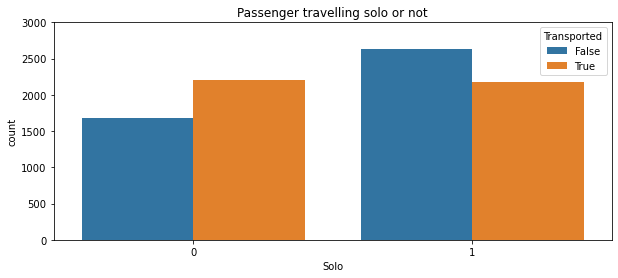

In [17]:
# New feature - Solo
# Create a binary feature indicating whether the passenger is traveling solo (Group size == 1)
train['Solo'] = (train['Group_size'] == 1).astype(int)
test['Solo'] = (test['Group_size'] == 1).astype(int)

# Plot distribution of the new feature
plt.figure(figsize=(10, 4))  # Set the size of the figure
sns.countplot(data=train, x='Solo', hue='Transported')  # Create a countplot of 'Solo' feature
plt.title('Passenger travelling solo or not')  # Set the title of the plot
plt.ylim([0, 3000])  # Limit the y-axis for better visualization


Cabin location

Extract deck, number and side from cabin feature.

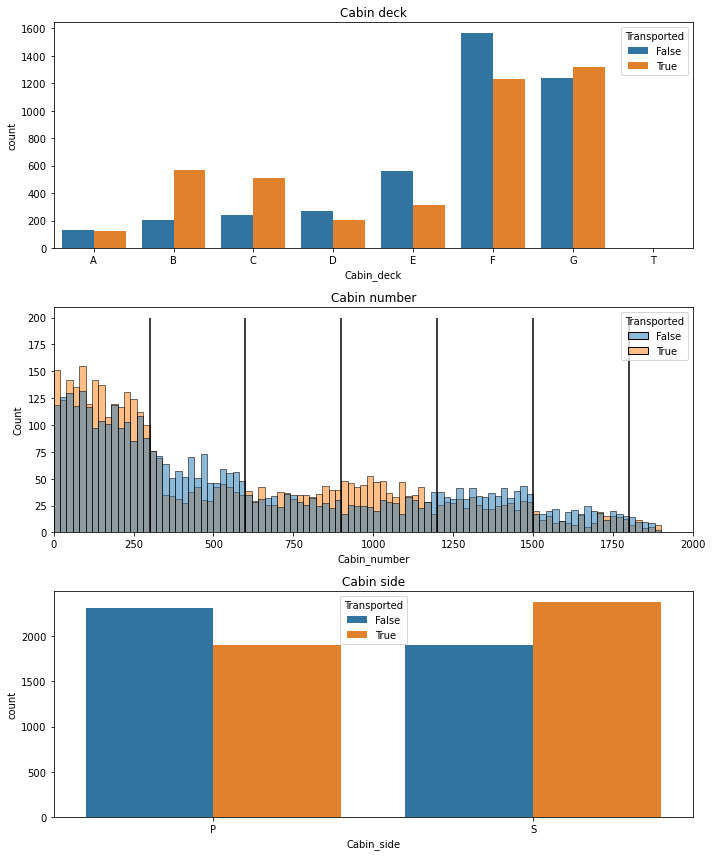

In [18]:
# Replace NaN's with outliers for now (so we can split feature)
# Fill missing values in 'Cabin' with outliers to facilitate feature splitting
train['Cabin'].fillna('Z/9999/Z', inplace=True)
test['Cabin'].fillna('Z/9999/Z', inplace=True)

# New features - training set
# Split 'Cabin' feature into 'Cabin_deck', 'Cabin_number', and 'Cabin_side'
train['Cabin_deck'] = train['Cabin'].apply(lambda x: x.split('/')[0])  # Extract the deck information
train['Cabin_number'] = train['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)  # Extract the cabin number
train['Cabin_side'] = train['Cabin'].apply(lambda x: x.split('/')[2])  # Extract the side information

# New features - test set
# Split 'Cabin' feature into 'Cabin_deck', 'Cabin_number', and 'Cabin_side'
test['Cabin_deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])  # Extract the deck information
test['Cabin_number'] = test['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)  # Extract the cabin number
test['Cabin_side'] = test['Cabin'].apply(lambda x: x.split('/')[2])  # Extract the side information

# Put NaN's back in (we will fill these later)
# Replace the previously inserted outliers with NaNs to represent missing values
train.loc[train['Cabin_deck'] == 'Z', 'Cabin_deck'] = np.nan
train.loc[train['Cabin_number'] == 9999, 'Cabin_number'] = np.nan
train.loc[train['Cabin_side'] == 'Z', 'Cabin_side'] = np.nan
test.loc[test['Cabin_deck'] == 'Z', 'Cabin_deck'] = np.nan
test.loc[test['Cabin_number'] == 9999, 'Cabin_number'] = np.nan
test.loc[test['Cabin_side'] == 'Z', 'Cabin_side'] = np.nan

# Drop Cabin (we don't need it anymore)
# Remove the original 'Cabin' feature as it has been split into new features
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# Plot distribution of new features
fig = plt.figure(figsize=(10, 12))  # Set the size of the figure

# Plot distribution of 'Cabin_deck'
plt.subplot(3, 1, 1)  # Create a subplot for the first plot
sns.countplot(data=train, x='Cabin_deck', hue='Transported', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])  # Create a countplot of 'Cabin_deck'
plt.title('Cabin deck')  # Set the title of the subplot

# Plot distribution of 'Cabin_number'
plt.subplot(3, 1, 2)  # Create a subplot for the second plot
sns.histplot(data=train, x='Cabin_number', hue='Transported', binwidth=20)  # Create a histogram of 'Cabin_number'
plt.vlines([300, 600, 900, 1200, 1500, 1800], ymin=0, ymax=200, color='black')  # Add vertical lines for reference
plt.title('Cabin number')  # Set the title of the subplot
plt.xlim([0, 2000])  # Limit the x-axis for better visualization

# Plot distribution of 'Cabin_side'
plt.subplot(3, 1, 3)  # Create a subplot for the third plot
sns.countplot(data=train, x='Cabin_side', hue='Transported')  # Create a countplot of 'Cabin_side'
plt.title('Cabin side')  # Set the title of the subplot

fig.tight_layout()  # Adjust layout to improve appearance


This is interesting! It appears that Cabin_number is grouped into chunks of 300 cabins. This means we can compress this feature into a categorical one, which indicates which chunk each passenger is in.

Other notes: The cabin deck 'T' seems to be an outlier (there are only 5 samples).

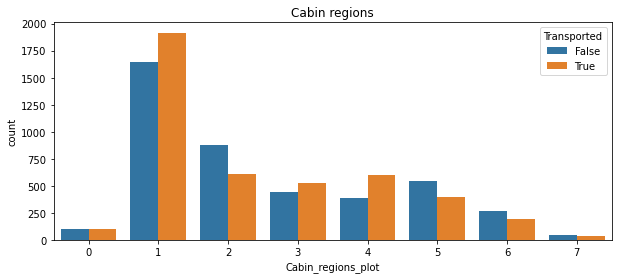

In [19]:
# New features - training set
# Create one-hot encoded features based on cabin number regions
train['Cabin_region1'] = (train['Cabin_number'] < 300).astype(int)   # Region 1: Cabin numbers less than 300
train['Cabin_region2'] = ((train['Cabin_number'] >= 300) & (train['Cabin_number'] < 600)).astype(int)   # Region 2: Cabin numbers between 300 and 599
train['Cabin_region3'] = ((train['Cabin_number'] >= 600) & (train['Cabin_number'] < 900)).astype(int)   # Region 3: Cabin numbers between 600 and 899
train['Cabin_region4'] = ((train['Cabin_number'] >= 900) & (train['Cabin_number'] < 1200)).astype(int)  # Region 4: Cabin numbers between 900 and 1199
train['Cabin_region5'] = ((train['Cabin_number'] >= 1200) & (train['Cabin_number'] < 1500)).astype(int) # Region 5: Cabin numbers between 1200 and 1499
train['Cabin_region6'] = ((train['Cabin_number'] >= 1500) & (train['Cabin_number'] < 1800)).astype(int) # Region 6: Cabin numbers between 1500 and 1799
train['Cabin_region7'] = (train['Cabin_number'] >= 1800).astype(int) # Region 7: Cabin numbers 1800 and above

# New features - test set
# Create one-hot encoded features based on cabin number regions
test['Cabin_region1'] = (test['Cabin_number'] < 300).astype(int)   # Region 1: Cabin numbers less than 300
test['Cabin_region2'] = ((test['Cabin_number'] >= 300) & (test['Cabin_number'] < 600)).astype(int)   # Region 2: Cabin numbers between 300 and 599
test['Cabin_region3'] = ((test['Cabin_number'] >= 600) & (test['Cabin_number'] < 900)).astype(int)   # Region 3: Cabin numbers between 600 and 899
test['Cabin_region4'] = ((test['Cabin_number'] >= 900) & (test['Cabin_number'] < 1200)).astype(int)  # Region 4: Cabin numbers between 900 and 1199
test['Cabin_region5'] = ((test['Cabin_number'] >= 1200) & (test['Cabin_number'] < 1500)).astype(int) # Region 5: Cabin numbers between 1200 and 1499
test['Cabin_region6'] = ((test['Cabin_number'] >= 1500) & (test['Cabin_number'] < 1800)).astype(int) # Region 6: Cabin numbers between 1500 and 1799
test['Cabin_region7'] = (test['Cabin_number'] >= 1800).astype(int) # Region 7: Cabin numbers 1800 and above

# Plot distribution of new features
plt.figure(figsize=(10, 4))  # Set the size of the figure
train['Cabin_regions_plot'] = (train['Cabin_region1'] + 2 * train['Cabin_region2'] + 3 * train['Cabin_region3'] + 4 * train['Cabin_region4'] + 5 * train['Cabin_region5'] + 6 * train['Cabin_region6'] + 7 * train['Cabin_region7']).astype(int)  # Combine regions into one feature for plotting
sns.countplot(data=train, x='Cabin_regions_plot', hue='Transported')  # Create a countplot of cabin regions
plt.title('Cabin regions')  # Set the title of the plot
train.drop('Cabin_regions_plot', axis=1, inplace=True)  # Drop the temporary feature used for plotting


Last name

Calculate family size from last name.

Text(0.5, 1.0, 'Family size')

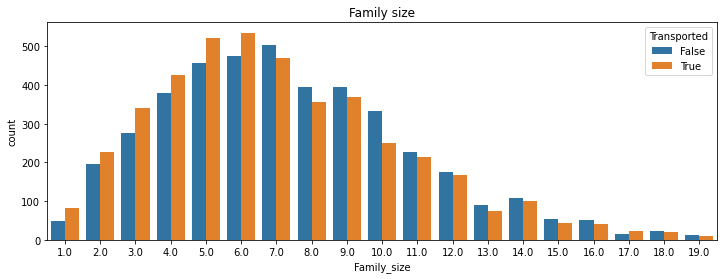

In [20]:
# Replace NaN's with outliers for now (so we can split feature)
# Fill NaN values in 'Name' column with 'Unknown Unknown'
train['Name'].fillna('Unknown Unknown', inplace=True)
test['Name'].fillna('Unknown Unknown', inplace=True)

# New feature - Surname
# Extract surnames from 'Name' column
train['Surname'] = train['Name'].str.split().str[-1]
test['Surname'] = test['Name'].str.split().str[-1]

# New feature - Family size
# Calculate family size based on surname occurrence
train['Family_size'] = train['Surname'].map(lambda x: pd.concat([train['Surname'], test['Surname']]).value_counts()[x])
test['Family_size'] = test['Surname'].map(lambda x: pd.concat([train['Surname'], test['Surname']]).value_counts()[x])

# Put Nan's back in (we will fill these later)
# Replace specific values with NaN for later imputation
train.loc[train['Surname'] == 'Unknown', 'Surname'] = np.nan
train.loc[train['Family_size'] > 100, 'Family_size'] = np.nan
test.loc[test['Surname'] == 'Unknown', 'Surname'] = np.nan
test.loc[test['Family_size'] > 100, 'Family_size'] = np.nan

# Drop 'Name' (we don't need it anymore)
# Drop the 'Name' column as we've extracted relevant information
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

# New feature distribution
# Plot the distribution of family sizes
plt.figure(figsize=(12, 4))  # Set the size of the plot
sns.countplot(data=train, x='Family_size', hue='Transported')  # Create a countplot of family sizes
plt.title('Family size')  # Set the title of the plot


# Missing values
Combine train and test

This will make it easier to fill missing values. We will split it back later.

In [21]:
# Labels and features
# Extract the target variable 'Transported' as labels
y = train['Transported'].copy().astype(int)
# Extract features by dropping the 'Transported' column
X = train.drop('Transported', axis=1).copy()

# Concatenate dataframes
# Concatenate the training and test sets along axis 0 (rows)
data = pd.concat([X, test], axis=0).reset_index(drop=True)


Explore missing values

In [22]:
# Columns with missing values
# Get the names of columns with missing values
na_cols = data.columns[data.isna().any()].tolist()

# Missing values summary
# Create a DataFrame to summarize missing values
mv = pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])  # Count the number of missing values in each column
mv['Percentage_missing'] = np.round(100 * mv['Number_missing'] / len(data), 2)  # Calculate the percentage of missing values


Text(0.5, 1.0, 'Heatmap of missing values')

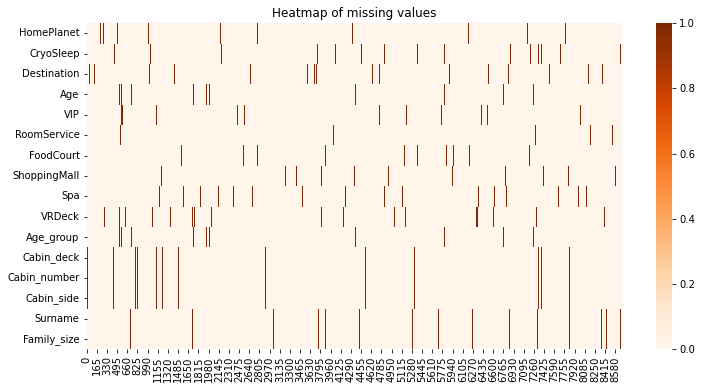

In [23]:
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(train[na_cols].isna().T, cmap='Oranges')
plt.title('Heatmap of missing values')

Missing values make up about 2% of the data, which is a relatively small amount. For the most part, they don't seem to be happening at the same time (except the features made from splitting Cabin and Name), but let's inspect closer.

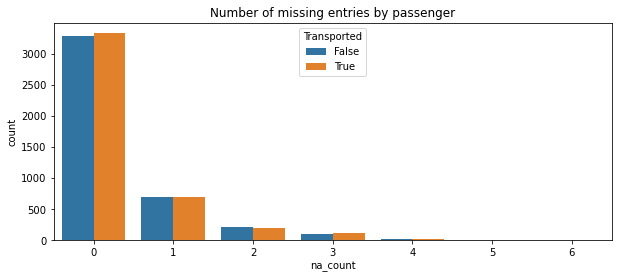

In [24]:
# Countplot of number of missing values by passenger
train['na_count']=train.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
train.drop('na_count', axis=1, inplace=True)

*Notes:*
* Missing values are independent of the target and for the most part are isolated. 
* Even though only 2% of the data is missing, about 25% of all passengers have at least 1 missing value.
* PassengerId is the only (original) feature to not have any missing values. 


*Insight:*
* Since most of the missing values are isolated it makes sense to try to fill these in as opposed to just dropping rows.
* If there is a relationship between PassengerId and other features we can fill missing values according to this column.

Strategy

The easiest way to deal with missing values is to just use the median for continuous features and the mode for categorical features  This will work 'well enough' but if we want to maximise the accuracy of our models then we need to look for patterns within the missing data. The way to do this is by looking at the joint distribution of features, e.g. do passengers from the same group tend to come from the same family? There are obviously many combinations so we will just summarise the useful trends I and others have found.

HomePlanet and Group

In [25]:
# Joint distribution of Group and HomePlanet
GHP_gb=data.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
GHP_gb.head()

HomePlanet  Earth  Europa  Mars
Group                          
1             0.0     1.0   0.0
2             1.0     0.0   0.0
3             0.0     2.0   0.0
4             1.0     0.0   0.0
5             1.0     0.0   0.0

C:\Users\rsrin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of unique home planets per group')

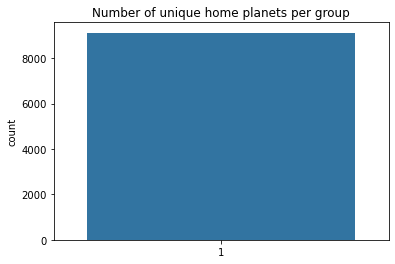

In [26]:
# Countplot of unique values
sns.countplot((GHP_gb>0).sum(axis=1))
plt.title('Number of unique home planets per group')

Great! This shows that everyone in the same group comes from the same home planet. So we can fill the missing HomePlanet values according to the group. (At least the ones where the group size is bigger than 1.)

In [27]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a group with known HomePlanet
GHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index

# Fill corresponding missing values
data.loc[GHP_index,'HomePlanet']=data.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 288
#HomePlanet missing values after: 157


We managed to fill 131 values with 100% confidence but we are not finished yet.

HomePlanet and CabinDeck

<AxesSubplot:xlabel='Cabin_deck', ylabel='HomePlanet'>

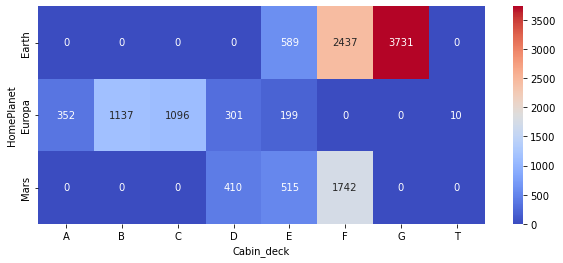

In [28]:
# Joint distribution of CabinDeck and HomePlanet
CDHP_gb=data.groupby(['Cabin_deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')

*Notes:*
* Passengers on decks A, B, C or T came from Europa.
* Passengers on deck G came from Earth.
* Passengers on decks D, E or F came from multiple planets.

In [29]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Decks A, B, C or T came from Europa
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G came from Earth
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='G'), 'HomePlanet']='Earth'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 157
#HomePlanet missing values after: 94


HomePlanet and Surname

C:\Users\rsrin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of unique planets per surname')

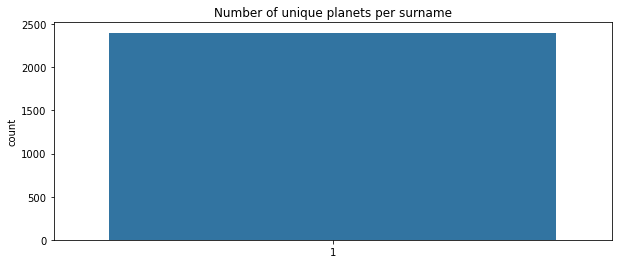

In [30]:
# Joint distribution of Surname and HomePlanet
SHP_gb=data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,4))
sns.countplot((SHP_gb>0).sum(axis=1))
plt.title('Number of unique planets per surname')

Fantastic! Everyone with the same surname comes from the same home planet.

In [31]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a family with known HomePlanet
SHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

# Fill corresponding missing values
data.loc[SHP_index,'HomePlanet']=data.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 94
#HomePlanet missing values after: 10


In [32]:
# Only 10 HomePlanet missing values left - let's look at them
data[data['HomePlanet'].isna()][['PassengerId','HomePlanet','Destination']]

PassengerId HomePlanet  Destination
2274      2443_01        NaN  TRAPPIST-1e
2631      2817_01        NaN  TRAPPIST-1e
3091      3331_01        NaN  TRAPPIST-1e
4548      4840_01        NaN  TRAPPIST-1e
5762      6108_01        NaN  TRAPPIST-1e
8969      0616_01        NaN  TRAPPIST-1e
10583     4052_01        NaN  TRAPPIST-1e
11913     7065_01        NaN  TRAPPIST-1e
12551     8435_01        NaN  TRAPPIST-1e
12725     8775_01        NaN  TRAPPIST-1e

Everyone left is heading towards TRAPPIST-1e. So let's look at the joint distribution of HomePlanet and Destination.

HomePlanet and Destination

<AxesSubplot:xlabel='HomePlanet', ylabel='Destination'>

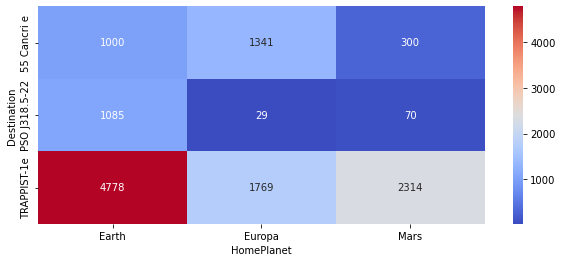

In [33]:
# Joint distribution of HomePlanet and Destination
HPD_gb=data.groupby(['HomePlanet','Destination'])['Destination'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(HPD_gb.T, annot=True, fmt='g', cmap='coolwarm')

Most people heading towards TRAPPIST-1e came from Earth so it makes sense to guess they came from there. But remember from earlier, no one on deck D came from Earth so we need to filter these out.

In [34]:
# Missing values before
HP_bef=data['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
data.loc[(data['HomePlanet'].isna()) & ~(data['Cabin_deck']=='D'), 'HomePlanet']='Earth'
data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 10
#HomePlanet missing values after: 0


Awesome! We're done with HomePlanet.

Destination

Since the majority (68%) of passengers are heading towards TRAPPIST-1e (see EDA section), we'll just impute this value (i.e. the mode). A better rule hasn't been found at this stage.

In [35]:
# Missing values before
D_bef=data['Destination'].isna().sum()

# Fill missing Destination values with mode
data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'

# Print number of missing values left
print('#Destination missing values before:',D_bef)
print('#Destination missing values after:',data['Destination'].isna().sum())

#Destination missing values before: 274
#Destination missing values after: 0


Surname and group

The reason we are filling missing surnames is because we will use surnames later to fill missing values of other features. It also means we can improve the accuracy of the family size feature.

C:\Users\rsrin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of unique surnames by group')

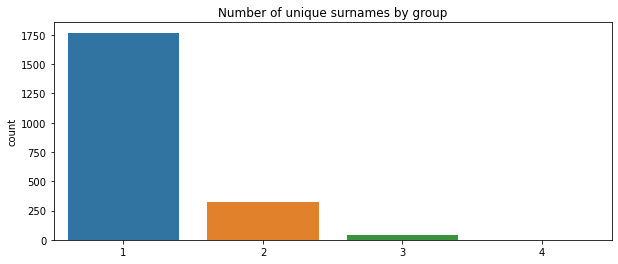

In [36]:
# Joint distribution of Group and Surname
GSN_gb=data[data['Group_size']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)

# Countplot of unique values
plt.figure(figsize=(10,4))
sns.countplot((GSN_gb>0).sum(axis=1))
plt.title('Number of unique surnames by group')

The majority (83%) of groups contain only 1 family. So let's fill missing surnames according to the majority surname in that group.

In [37]:
# Missing values before
SN_bef=data['Surname'].isna().sum()

# Passengers with missing Surname and in a group with known majority Surname
GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['Group']).isin(GSN_gb.index)].index

# Fill corresponding missing values
data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['Group'].map(lambda x: GSN_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Surname missing values before:',SN_bef)
print('#Surname missing values after:',data['Surname'].isna().sum())

#Surname missing values before: 294
#Surname missing values after: 155


That is the best we can do. We don't have to get rid of all of these missing values because we will end up dropping the surname feature anyway. However, we can update the family size feature.

In [38]:
# Replace NaN's with outliers (so we can use map)
data['Surname'].fillna('Unknown', inplace=True)

# Update family size feature
data['Family_size']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

# Put NaN's back in place of outliers
data.loc[data['Surname']=='Unknown','Surname']=np.nan

# Say unknown surname means no family
data.loc[data['Family_size']>100,'Family_size']=0

CabinSide and Group

C:\Users\rsrin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rsrin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rsrin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


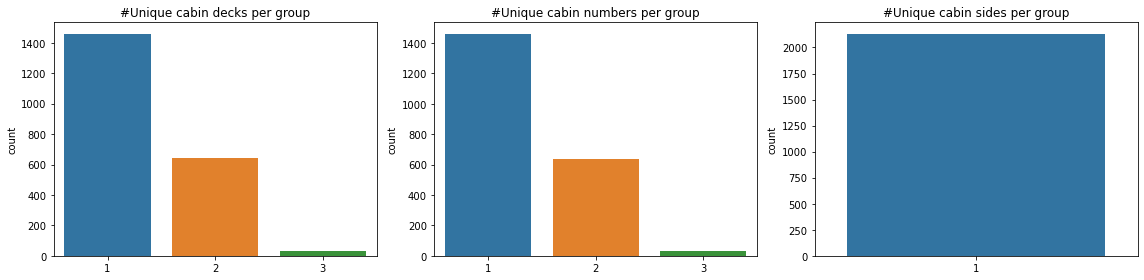

In [39]:
# Joint distribution of Group and Cabin features
GCD_gb=data[data['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
GCN_gb=data[data['Group_size']>1].groupby(['Group','Cabin_number'])['Cabin_number'].size().unstack().fillna(0)
GCS_gb=data[data['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

# Countplots
fig=plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.countplot((GCD_gb>0).sum(axis=1))
plt.title('#Unique cabin decks per group')

plt.subplot(1,3,2)
sns.countplot((GCN_gb>0).sum(axis=1))
plt.title('#Unique cabin numbers per group')

plt.subplot(1,3,3)
sns.countplot((GCS_gb>0).sum(axis=1))
plt.title('#Unique cabin sides per group')
fig.tight_layout()

Another rule! Everyone in the same group is also on the same cabin side. For cabin deck and cabin number there is also a fairly good (but not perfect) correlation with group.

In [40]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Passengers with missing Cabin side and in a group with known Cabin side
GCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Group']).isin(GCS_gb.index)].index

# Fill corresponding missing values
data.loc[GCS_index,'Cabin_side']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 299
#Cabin_side missing values after: 162


CabinSide and Surname

Text(0.5, 1.0, 'Ratio of cabin side by surname')

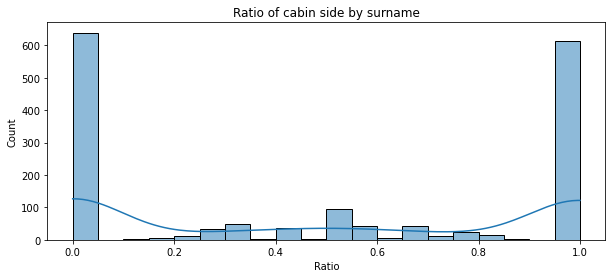

In [41]:
# Joint distribution of Surname and Cabin side
SCS_gb=data[data['Group_size']>1].groupby(['Surname','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

# Ratio of sides
SCS_gb['Ratio']=SCS_gb['P']/(SCS_gb['P']+SCS_gb['S'])

# Histogram of ratio
plt.figure(figsize=(10,4))
sns.histplot(SCS_gb['Ratio'], kde=True, binwidth=0.05)
plt.title('Ratio of cabin side by surname')

In [42]:
# Print proportion
print('Percentage of families all on the same cabin side:', 100*np.round((SCS_gb['Ratio'].isin([0,1])).sum()/len(SCS_gb),3),'%')

# Another view of the same information
SCS_gb.head()

Percentage of families all on the same cabin side: 76.7 %


Cabin_side    P    S  Ratio
Surname                    
Acobson     0.0  3.0    0.0
Acobsond    3.0  0.0    1.0
Adavisons   6.0  0.0    1.0
Admingried  0.0  4.0    0.0
Aginge      3.0  0.0    1.0

This shows that families tend to be on the same cabin side (and 77% of families are entirely on the same side).

In [43]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Drop ratio column
SCS_gb.drop('Ratio', axis=1, inplace=True)

# Passengers with missing Cabin side and in a family with known Cabin side
SCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Surname']).isin(SCS_gb.index)].index

# Fill corresponding missing values
data.loc[SCS_index,'Cabin_side']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])

# Drop surname (we don't need it anymore)
data.drop('Surname', axis=1, inplace=True)

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 162
#Cabin_side missing values after: 66


The remaining missing values will be replaced with an outlier. This is because we really don't know which one of the two (balanced) sides we should assign.

In [44]:
# Value counts
data['Cabin_side'].value_counts()

S    6504
P    6400
Name: Cabin_side, dtype: int64

In [45]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Fill remaining missing values with outlier
data.loc[data['Cabin_side'].isna(),'Cabin_side']='Z'

# Print number of missing values left
print('#Cabin_side missing values before:',CS_bef)
print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 66
#Cabin_side missing values after: 0


CabinDeck and Group

Remember (from above) that groups tend to be on the same cabin deck.

In [46]:
# Missing values before
CD_bef=data['Cabin_deck'].isna().sum()

# Passengers with missing Cabin deck and in a group with known majority Cabin deck
GCD_index=data[data['Cabin_deck'].isna()][(data[data['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index

# Fill corresponding missing values
data.loc[GCD_index,'Cabin_deck']=data.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

# Print number of missing values left
print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 299
#Cabin_deck missing values after: 162


CabinDeck and HomePlanet

In [47]:
# Joint distribution
data.groupby(['HomePlanet','Destination','Solo','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)

Cabin_deck                         A      B      C      D      E       F  \
HomePlanet Destination   Solo                                              
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0   20.0    90.0   
                         1       0.0    0.0    0.0    0.0   47.0   289.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0   18.0    67.0   
                         1       0.0    0.0    0.0    0.0   25.0   262.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0  133.0   438.0   
                         1       0.0    0.0    0.0    0.0  358.0  1350.0   
Europa     55 Cancri e   0      96.0  377.0  313.0   59.0   35.0     0.0   
                         1      67.0  141.0  159.0   46.0   34.0     0.0   
           PSO J318.5-22 0       2.0    5.0   11.0    0.0    0.0     0.0   
                         1       0.0    0.0   10.0    0.0    0.0     0.0   
           TRAPPIST-1e   0     152.0  459.0  428.0  120.0   53.0     0.0   
                         1      44.0  179.0  201.0   84.0   82.0     0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   32.0   15.0   104.0   
                         1       0.0    0.0    0.0   40.0   16.0    92.0   
           PSO J318.5-22 0       0.0    0.0    0.0    8.0    9.0    14.0   
                         1       0.0    0.0    0.0    9.0    7.0    21.0   
           TRAPPIST-1e   0       0.0    0.0    0.0  168.0  219.0   798.0   
                         1       0.0    0.0    0.0  164.0  263.0   743.0   

Cabin_deck                          G    T  
HomePlanet Destination   Solo               
Earth      55 Cancri e   0      272.0  0.0  
                         1      269.0  0.0  
           PSO J318.5-22 0      230.0  0.0  
                         1      466.0  0.0  
           TRAPPIST-1e   0     1075.0  0.0  
                         1     1509.0  0.0  
Europa     55 Cancri e   0        0.0  2.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  1.0  
                         1        0.0  8.0  
Mars       55 Cancri e   0        0.0  0.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  0.0  
                         1        0.0  0.0

*Insights:*
* Passengers from Mars are most likely in deck F.
* Passengers from Europa are (more or less) most likely in deck C if travelling solo and deck B otherwise.
* Passengers from Earth are (more or less) most likely in deck G.

We will fill in missing values according to where the mode appears in these subgroups.

In [48]:
# Missing values before
CD_bef=data['Cabin_deck'].isna().sum()

# Fill missing values using the mode
na_rows_CD=data.loc[data['Cabin_deck'].isna(),'Cabin_deck'].index
data.loc[data['Cabin_deck'].isna(),'Cabin_deck']=data.groupby(['HomePlanet','Destination','Solo'])['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

# Print number of missing values left
print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 162
#Cabin_deck missing values after: 0


**CabinNumber and CabinDeck**

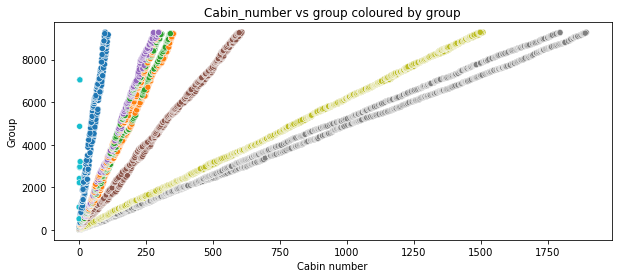

In [56]:
# Import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Scatterplot
plt.figure(figsize=(10,4))
# Use LabelEncoder to encode categorical variable 'Cabin_deck'
sns.scatterplot(x=data['Cabin_number'], y=data['Group'], 
                c=LabelEncoder().fit_transform(data.loc[~data['Cabin_number'].isna(),'Cabin_deck']), cmap='tab10')
plt.title('Cabin_number vs group coloured by group')
plt.xlabel('Cabin number')
plt.ylabel('Group')
plt.show()


There is a fascinating pattern present here. On a deck-by-deck basis, there is a linear relationship between the cabin number and group number. In order to obtain a rough cabin number, we can extrapolate the missing cabin numbers using linear regression on a deck-by-deck basis.

In [58]:
# Import LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Missing values before
CN_bef = data['Cabin_number'].isna().sum()

# Extrapolate linear relationship on a deck by deck basis
for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    # Features and labels
    X_CN = data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck), 'Group']
    y_CN = data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck), 'Cabin_number']
    X_test_CN = data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck), 'Group']

    # Linear regression
    model_CN = LinearRegression()
    model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
    preds_CN = model_CN.predict(X_test_CN.values.reshape(-1, 1))
    
    # Fill missing values with predictions
    data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck), 'Cabin_number'] = preds_CN.astype(int)

# Print number of missing values left
print('# Cabin_number missing values before:', CN_bef)
print('# Cabin_number missing values after:', data['Cabin_number'].isna().sum())


# Cabin_number missing values before: 299
# Cabin_number missing values after: 0


Let's update the cabin regions with the new data.

In [59]:
# One-hot encode cabin regions
data['Cabin_region1']=(data['Cabin_number']<300).astype(int)
data['Cabin_region2']=((data['Cabin_number']>=300) & (data['Cabin_number']<600)).astype(int)
data['Cabin_region3']=((data['Cabin_number']>=600) & (data['Cabin_number']<900)).astype(int)
data['Cabin_region4']=((data['Cabin_number']>=900) & (data['Cabin_number']<1200)).astype(int)
data['Cabin_region5']=((data['Cabin_number']>=1200) & (data['Cabin_number']<1500)).astype(int)
data['Cabin_region6']=((data['Cabin_number']>=1500) & (data['Cabin_number']<1800)).astype(int)
data['Cabin_region7']=(data['Cabin_number']>=1800).astype(int)

# VIP
VIP is a highly unbalanced binary feature so we will just impute the mode.

In [60]:
data['VIP'].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [61]:
# Missing values before
V_bef=data['VIP'].isna().sum()

# Fill missing values with mode
data.loc[data['VIP'].isna(),'VIP']=False

# Print number of missing values left
print('#VIP missing values before:',V_bef)
print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 296
#VIP missing values after: 0


# Age

Age varies across many features like HomePlanet, group size, expenditure and cabin deck, so we will impute missing values according to the median of these subgroups.

In [62]:
# Joint distribution
data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].median().unstack().fillna(0)

Cabin_deck                      A     B     C     D     E     F     G     T
HomePlanet No_spending Solo                                                
Earth      0           0      0.0   0.0   0.0   0.0  24.0  25.0  28.0   0.0
                       1      0.0   0.0   0.0   0.0  25.0  24.0  26.0   0.0
           1           0      0.0   0.0   0.0   0.0   7.0  16.0   8.0   0.0
                       1      0.0   0.0   0.0   0.0  21.0  21.5  23.0   0.0
Europa     0           0     35.0  34.0  33.0  33.0  34.0   0.0   0.0  44.0
                       1     35.0  36.0  35.5  34.0  35.0   0.0   0.0  35.0
           1           0     30.0  27.0  28.5  27.0  28.0   0.0   0.0   0.0
                       1     37.5  34.0  35.0  31.0  33.0   0.0   0.0   0.0
Mars       0           0      0.0   0.0   0.0  30.0  29.0  29.0   0.0   0.0
                       1      0.0   0.0   0.0  31.0  28.5  30.0   0.0   0.0
           1           0      0.0   0.0   0.0  29.5  26.0  18.0   0.0   0.0
                       1      0.0   0.0   0.0  33.0  30.0  29.5   0.0   0.0

In [63]:
# Missing values before
A_bef=data[exp_feats].isna().sum().sum()

# Fill missing values using the median
na_rows_A=data.loc[data['Age'].isna(),'Age'].index
data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

# Print number of missing values left
print('#Age missing values before:',A_bef)
print('#Age missing values after:',data['Age'].isna().sum())

#Age missing values before: 1410
#Age missing values after: 0


Let's update the age_group feature using the new data.

In [64]:
# Update age group feature
data.loc[data['Age']<=12,'Age_group']='Age_0-12'
data.loc[(data['Age']>12) & (data['Age']<18),'Age_group']='Age_13-17'
data.loc[(data['Age']>=18) & (data['Age']<=25),'Age_group']='Age_18-25'
data.loc[(data['Age']>25) & (data['Age']<=30),'Age_group']='Age_26-30'
data.loc[(data['Age']>30) & (data['Age']<=50),'Age_group']='Age_31-50'
data.loc[data['Age']>50,'Age_group']='Age_51+'

# CryoSleep

The best way to predict if a passenger is in CryoSleep or not is to see if they spent anything.

In [65]:
# Joint distribution
data.groupby(['No_spending','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)

CryoSleep     False    True
No_spending                
0            7339.0     0.0
1             740.0  4581.0

In [66]:
# Missing values before
CSL_bef=data['CryoSleep'].isna().sum()

# Fill missing values using the mode
na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['No_spending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

# Print number of missing values left
print('#CryoSleep missing values before:',CSL_bef)
print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

#CryoSleep missing values before: 310
#CryoSleep missing values after: 0


# Expenditure and CryoSleep

This one makes a lot of sense. We don't expect people in CryoSleep to be able to spend anything.

In [67]:
print('Maximum expenditure of passengers in CryoSleep:',data.loc[data['CryoSleep']==True,exp_feats].sum(axis=1).max())

Maximum expenditure of passengers in CryoSleep: 0.0


In [68]:
# Missing values before
E_bef=data[exp_feats].isna().sum().sum()

# CryoSleep has no expenditure
for col in exp_feats:
    data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0

# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 1410
#Expenditure missing values after: 866


# Expenditure and others

Spending varies across numerous characteristics, however in order to avoid overfitting, we will only infer missing values using HomePlanet, Solo, and Age group. We'll also use the mean rather than the median because the median typically equals zero because many travelers don't spend anything. Take note of the fact that children under the age of 12 never spend any money.

In [69]:
# Joint distribution
data.groupby(['HomePlanet','Solo','Age_group'])['Expenditure'].mean().unstack().fillna(0)

Age_group        Age_0-12    Age_13-17    Age_18-25    Age_26-30    Age_31-50  \
HomePlanet Solo                                                                 
Earth      0          0.0   724.902222   789.700555   841.093596   736.655773   
           1          0.0   693.014898   779.395942   795.420690   794.818627   
Europa     0          0.0  1153.160256  2652.013298  3534.668246  3975.774005   
           1          0.0     0.000000  2489.888889  3806.000000  3949.939929   
Mars       0          0.0  1176.839286  1161.808333  1247.098361  1143.671916   
           1          0.0  1687.261538  1075.341146  1107.122677  1110.392045   

Age_group            Age_51+  
HomePlanet Solo               
Earth      0      733.649573  
           1      826.366972  
Europa     0     3483.639004  
           1     3952.085526  
Mars       0     1345.419643  
           1     1100.298387

In [70]:
# Fill remaining missing values using the median
for col in exp_feats:
    na_rows=data.loc[data[col].isna(),col].index
    data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]
    
# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 1410
#Expenditure missing values after: 0


Finally, we can update the expenditure and no_spending features with these new data points.

In [71]:
# Update expenditure and no_spending
data['Expenditure']=data[exp_feats].sum(axis=1)
data['No_spending']=(data['Expenditure']==0).astype(int)

In [72]:
data.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Age_group        0
Expenditure      0
No_spending      0
Group            0
Group_size       0
Solo             0
Cabin_deck       0
Cabin_number     0
Cabin_side       0
Cabin_region1    0
Cabin_region2    0
Cabin_region3    0
Cabin_region4    0
Cabin_region5    0
Cabin_region6    0
Cabin_region7    0
Family_size      0
dtype: int64

**No missing values left!** It was a lot of effort but it should improve the accuracy of our models.

# Preprocessing
Split data back into train and test sets

In [73]:
# Train and test
X=data[data['PassengerId'].isin(train['PassengerId'].values)].copy()
X_test=data[data['PassengerId'].isin(test['PassengerId'].values)].copy()

**Drop unwanted features**

In [74]:
# Drop qualitative/redundant/collinear/high cardinality features
X.drop(['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin_number'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Group', 'Group_size', 'Age_group', 'Cabin_number'], axis=1, inplace=True)

**Log transform**

It’s one of several methods that you can use to transform datasets to achieve linearity. This means it can help us obtain further insights into your data that may not be obvious at first. The log transformation can be used to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more. It can make it easier for algorithms to 'learn' the correct relationships. We will apply it to the expenditure features as these are heavily skewed by outliers. 

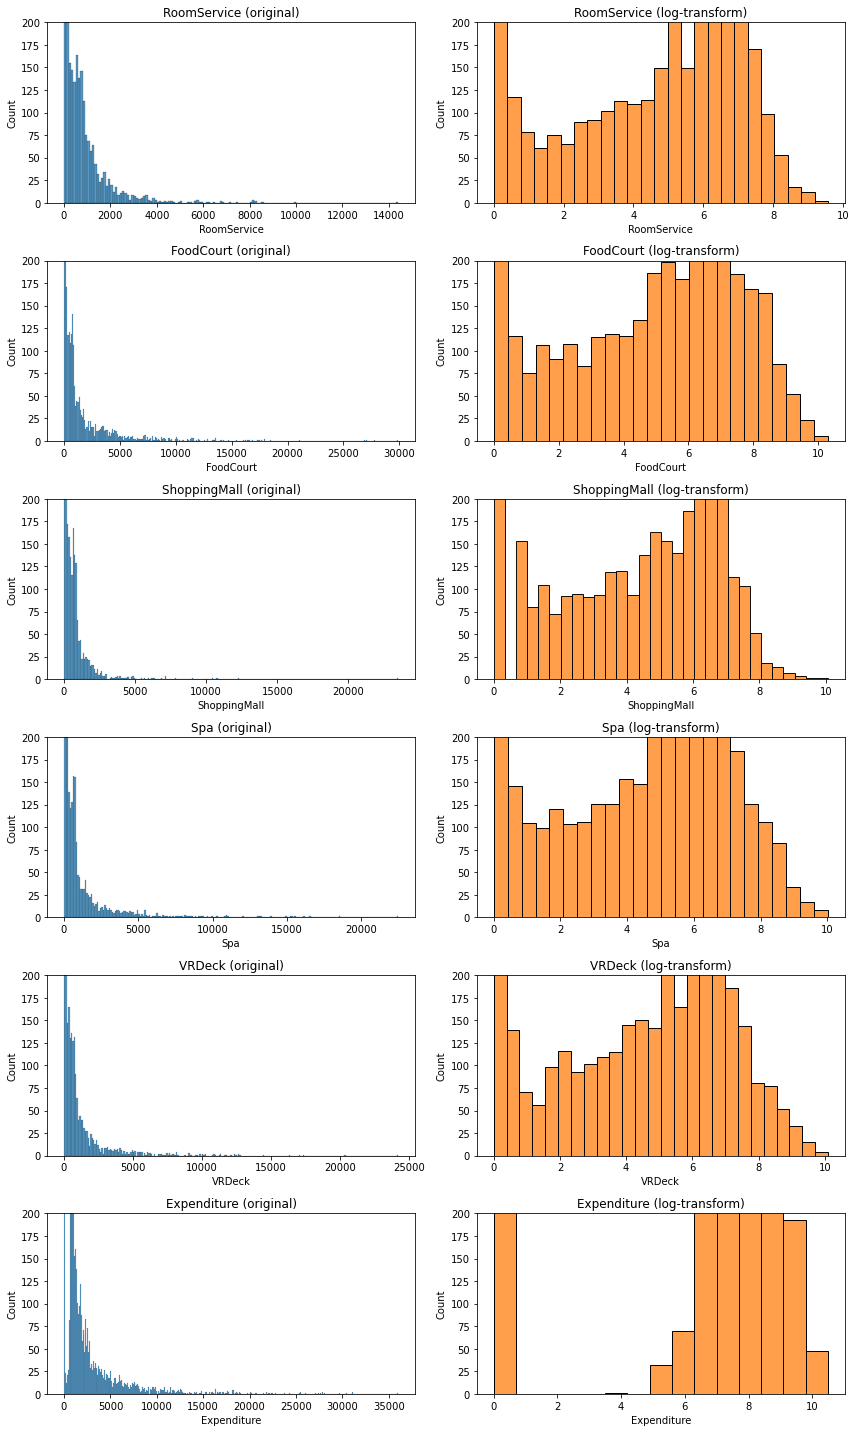

In [75]:
# Plot log transform results
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(X[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+X[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

In [76]:
# Apply log transform
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col])

Encoding and scaling

We will use column transformers to be more professional.

In [79]:
# Import necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Indentify numerical and categorical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Scale numerical data to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False))])

# Combine preprocessing
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough')

# Apply preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

# Print new shape
print('Training set shape:', X.shape)


Training set shape: (8693, 36)


# PCA

A statistical method known as Principal Component Analysis (PCA) is used to reduce data without losing any of its features. Essentially, it does so without omitting a significant portion of the original information by describing the composition of variances and covariances through various linear combinations of the basic variables. In other words, the goal is to identify the particular set of orthogonal axes on which the data variance is highest. Its major goal is to solve the problem's multidimensionality. When dimensionality is reduced, it should be done so that the smallest amount of data is lost when higher dimensions are dropped.
	Principal component analysis can also shed light on relationships between variables that are not immediately apparent. It aids in the analysis of the distribution of the observations and the identification of the distribution-related variables. Below is an illustration of transformed data in the PCA space. This gives a low dimensional representation of the data, which preserves local and global structure.


In [81]:
# Import necessary library
import plotly.express as px

# Perform PCA with 3 components
pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

# Create 3D scatter plot
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y, size=0.1*np.ones(len(X)), opacity=1,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=800, height=500
)
fig.show()


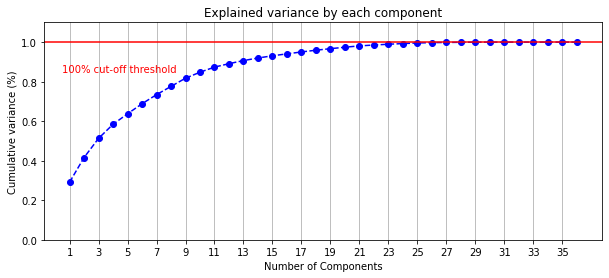

In [82]:
# Explained variance (how important each additional principal component is)
pca = PCA().fit(X)
fig, ax = plt.subplots(figsize=(10,4))
xi = np.arange(1, 1+X.shape[1], step=1)
yi = np.cumsum(pca.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+X.shape[1], step=2))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red')
ax.grid(axis='x')

Create a validation set

We will use this to choose which model(s) to use.

In [84]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.8, test_size=0.2, random_state=0)


# Model selection

To briefly mention the algorithms I used.

*Logistic Regression:* This model fits a sigmoid-curve to the distribution of the target variable using Maximum Likelihood Estimation as opposed to linear regression, which utilizes Least Squares. When a binary output was provided for the data in question, the sigmoid/logistic curve is frequently utilized.
*********************************************************************************************************************************************************************
*K-Nearest Neighbours (KNN):* The metric employed is typically Euclidean distance, and KNN operates by choosing the majority class of the k-nearest neighbors. Although it is a straightforward and efficient technique, it can be sensitive to a number of variables, including the value of k, how the data was pre-processed, and the measure employed.
*********************************************************************************************************************************************************************
*Support Vector Machine (SVM):* SVM identifies the best hyperplane that seperates the data in the feature space. By examining which side of the hyperplane, the test point is located on, predictions are produced. Ordinary SVM makes the unfounded assumption that the data is always linearly separable. When this presumption fails, it is possible to transfer the data into a higher-dimensional space where it can be linearly separated using a kernel approach. SVM is a well-liked algorithm since it uses little computer resources and yields excellent results.
*********************************************************************************************************************************************************************
*Random Forest (RF):* Regression or classification issues can be solved using the trustworthy ensemble of decision trees known as Random Forest. Individual trees are constructed using bagging (i.e., the aggregation of bootstraps, which are nothing more than several train datasets produced through sampling with replacement) and divided using fewer features in this case. Because of the lower variance, the diversified forest of uncorrelated trees that results is more resistant to data change and maintains its prediction accuracy for new data. Both continuous and categorical data can be used successfully.
*********************************************************************************************************************************************************************
*Light Gradient Boosting Machine (LGBM):* XGBoost and LGBM both function roughly the same way, although LGBM uses a gentler boosting method. It usually gives similar results to XGBoost but is substantially faster.
*********************************************************************************************************************************************************************
*Categorical Boosting (CatBoost):* Gradient boosted decision trees are the foundation of the open-source method CatBoost. It supports text, numerical, and category features. It is effective even with relatively tiny and heterogeneous data. Informally, it aims to combine the greatest aspects of LGBM and XGBoost.
Naive Bayes (NB): By applying the Bayes' Theorem, Naive Bayes gains the ability to classify data. It incorporates prior knowledge in accordance with Bayes' law to 'update' the likelihood of an event. Although the technique is relatively quick, it has the drawback of assuming independent input features, which is not necessarily the case.



We will train these models and evaluate them on the validation set to then choose which ones to carry through to the next stage (cross validation).

Define classifiers



In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Classifiers
classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0),  # Logistic Regression classifier
    "KNN" : KNeighborsClassifier(),  # K-Nearest Neighbors classifier
    "SVC" : SVC(random_state=0, probability=True),  # Support Vector Classifier
    "RandomForest" : RandomForestClassifier(random_state=0),  # Random Forest classifier
    "LGBM" : LGBMClassifier(random_state=0),  # LightGBM classifier
    "CatBoost" : CatBoostClassifier(random_state=0, verbose=False),  # CatBoost classifier
    "NaiveBayes": GaussianNB()  # Gaussian Naive Bayes classifier
}

# Grids for grid search
LR_grid = {'penalty': ['l1','l2'],  # Grid for Logistic Regression hyperparameters
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],  # Grid for Logistic Regression hyperparameters
           'max_iter': [50, 100, 150]}  # Grid for Logistic Regression hyperparameters

KNN_grid = {'n_neighbors': [3, 5, 7, 9],  # Grid for K-Nearest Neighbors hyperparameters
            'p': [1, 2]}  # Grid for K-Nearest Neighbors hyperparameters

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],  # Grid for Support Vector Classifier hyperparameters
            'kernel': ['linear', 'rbf'],  # Grid for Support Vector Classifier hyperparameters
            'gamma': ['scale', 'auto']}  # Grid for Support Vector Classifier hyperparameters

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],  # Grid for Random Forest hyperparameters
           'max_depth': [4, 6, 8, 10, 12]}  # Grid for Random Forest hyperparameters

boosted_grid = {'n_estimators': [50, 100, 150, 200],  # Grid for boosting classifiers hyperparameters
                'max_depth': [4, 8, 12],  # Grid for boosting classifiers hyperparameters
                'learning_rate': [0.05, 0.1, 0.15]}  # Grid for boosting classifiers hyperparameters

NB_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}  # Grid for Gaussian Naive Bayes hyperparameters

# Dictionary of all grids
grid = {
    "LogisticRegression" : LR_grid,  # Grid for Logistic Regression
    "KNN" : KNN_grid,  # Grid for K-Nearest Neighbors
    "SVC" : SVC_grid,  # Grid for Support Vector Classifier
    "RandomForest" : RF_grid,  # Grid for Random Forest
    "LGBM" : boosted_grid,  # Grid for LightGBM
    "CatBoost" : boosted_grid,  # Grid for CatBoost
    "NaiveBayes": NB_grid  # Grid for Gaussian Naive Bayes
}


# Train and evaluating models


In [94]:
import time
from sklearn.model_selection import GridSearchCV

i=0
clf_best_params=classifiers.copy()
valid_scores=pd.DataFrame({'Classifer':classifiers.keys(), 'Validation accuracy': np.zeros(len(classifiers)), 'Training time': np.zeros(len(classifiers))})
for key, classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)

    # Train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1]=clf.score(X_valid, y_valid)

    # Save trained model
    clf_best_params[key]=clf.best_params_
    
    # Print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2]=np.round((stop - start)/60, 2)
    
    print('Model:', key)
    print('Training time (mins):', valid_scores.iloc[i,2])
    print('')
    i+=1

C:\Users\rsrin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rsrin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rsrin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rsrin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Val

Model: LogisticRegression
Training time (mins): 0.14

Model: KNN
Training time (mins): 0.05

Model: SVC
Training time (mins): 6.23

Model: RandomForest
Training time (mins): 0.53

Model: LGBM
Training time (mins): 0.2

Model: CatBoost
Training time (mins): 11.34

Model: NaiveBayes
Training time (mins): 0.01



In [95]:
# Show results
valid_scores

Classifer  Validation accuracy  Training time
0  LogisticRegression             0.769983           0.14
1                 KNN             0.756182           0.05
2                 SVC             0.793560           6.23
3        RandomForest             0.790109           0.53
4                LGBM             0.797585           0.20
5            CatBoost             0.808511          11.34
6          NaiveBayes             0.719379           0.01

Motivated by this, we will take LGBM and CatBoost to the final stage of modelling.

# Modelling
We can finally train our best model on the whole training set using cross validation and ensembling predictions together to produce the most confident predictions.


# Defining best models
Overfitting is one of the key problems we want to avoid while training a machine learning model. This occurs when your model successfully fits the training data but fails to generalize and produce reliable predictions for untrained data. Data scientists utilize a method called cross-validation, where they divide their data into two parts—the training set and the validation set—to determine whether their model is overfitting. The validation set is solely used to assess the model's performance; the training set is utilized to train the model.

Metrics on the training set enable us evaluate how our model is progressing in terms of its training, but it's metrics on the validation set that let us obtain a gauge of the quality of your model - how well it's able to make new predictions based on data it hasn't seen before. With this in mind, loss and accuracy are measurements of loss and accuracy on the training set, whereas val loss and val acc are measures of loss and accuracy on the validation set. And with that stated, it was discovered in our experiment that CatBoost has the highest accuracy (0.808), followed by LGBM (0.797), which came in second, and Random Forest (0.79) in third.

This serves as motivation for us to move the top three performers to the final modeling step, where we can ultimately train our best model on the entire training set using cross validation and combining forecasts to produce the most accurate predictions.


In [98]:
# Define a dictionary to store the best classifiers with their respective best parameters
best_classifiers = {
    "LGBM" : LGBMClassifier(**clf_best_params["LGBM"], random_state=0),  # LightGBM classifier with best parameters
    "CatBoost" : CatBoostClassifier(**clf_best_params["CatBoost"], verbose=False, random_state=0),  # CatBoost classifier with best parameters
    "RandomForest" : RandomForestClassifier(**clf_best_params["RandomForest"], verbose=False, random_state=0),  # Random Forest classifier with best parameters
}


# Cross validation and ensembling predictions

Predictions are ensembled together using soft voting. This averages the predicted probabilies to produce the most confident predictions.

In [101]:
from sklearn.model_selection import StratifiedKFold  # Import StratifiedKFold

# Define the number of folds in cross-validation
FOLDS = 10

# Initialize an array to store the predictions
preds = np.zeros(len(X_test))

# Iterate over each classifier in the best_classifiers dictionary
for key, classifier in best_classifiers.items():
    start = time.time()  # Start timer
    
    # 10-fold cross validation
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)  # Define cross-validation strategy
    
    score = 0  # Initialize score
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        # Get training and validation sets
        X_train, X_valid = X[train_idx], X[val_idx]
        y_train, y_valid = y[train_idx], y[val_idx]
        
        # Train model
        clf = classifier
        clf.fit(X_train, y_train)
        
        # Make predictions and measure accuracy
        preds += clf.predict_proba(X_test)[:, 1]
        score += clf.score(X_valid, y_valid)
    
    # Average accuracy over folds
    score = score / FOLDS
    
    # Stop timer
    stop = time.time()
    
    # Print average accuracy and training time
    print('Model:', key)
    print('Average validation accuracy:', np.round(100 * score, 2))
    print('Training time (mins):', np.round((stop - start) / 60, 2))
    print('')

# Ensemble predictions
preds = preds / (FOLDS * len(best_classifiers))


Model: LGBM
Average validation accuracy: 81.02
Training time (mins): 0.03

Model: CatBoost
Average validation accuracy: 81.26
Training time (mins): 0.12

Model: RandomForest
Average validation accuracy: 80.46
Training time (mins): 0.17



# Let's also look at the distribution of the predicted probabilities.

Text(0.5, 0, 'Probability')

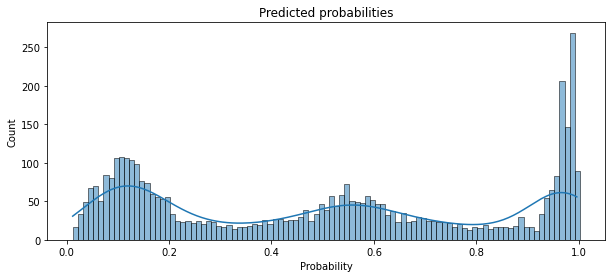

In [102]:
plt.figure(figsize=(10,4))
sns.histplot(preds, binwidth=0.01, kde=True)
plt.title('Predicted probabilities')
plt.xlabel('Probability')

It's interesting to note that the models don't show much confidence in between; they are either very confident or quite unconfident.

# Post processing

Last but not least, we must assign each anticipated probability to one of the two classes (transported or not). Rounding each probability to the closest integer is the simplest method (0 for False or 1 for True). We can adjust the classification threshold to get a comparable proportion of transported/not transported in our predictions as in the train set, though, providing the train and test sets have similar distributions. Here we keep in mind that 50.4% of the passengers being transported were on the train set.

In [103]:
# Proportion (in test set) we get from rounding
print(np.round(100*np.round(preds).sum()/len(preds),2))

51.67


Our models seem to (potentially) overestimate the number of transported passengers in the test set. Let's try to bring that proportion down a bit. 

Optimal threshold: 0.498


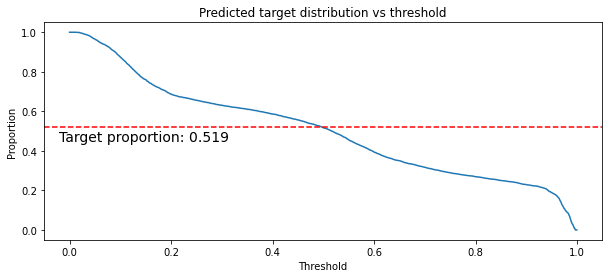

In [104]:
# Proportion of predicted positive (transported) classes
def preds_prop(preds_arr, thresh):
    pred_classes=(preds_arr>=thresh).astype(int)
    return pred_classes.sum()/len(pred_classes)

# Plot proportions across a range of thresholds
def plot_preds_prop(preds_arr):
    # Array of thresholds
    T_array=np.arange(0,1,0.001)
    
    # Calculate proportions
    prop=np.zeros(len(T_array))
    for i, T in enumerate(T_array):
        prop[i]=preds_prop(preds_arr, T)
        
    # Plot proportions
    plt.figure(figsize=(10,4))
    plt.plot(T_array, prop)
    target_prop=0.519         # Experiment with this value
    plt.axhline(y=target_prop, color='r', linestyle='--')
    plt.text(-0.02,0.45,f'Target proportion: {target_prop}', fontsize=14)
    plt.title('Predicted target distribution vs threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Proportion')
    
    # Find optimal threshold (the one that leads to the proportion being closest to target_prop)
    T_opt=T_array[np.abs(prop-target_prop).argmin()]
    print('Optimal threshold:', T_opt)
    return T_opt
    
T_opt=plot_preds_prop(preds)

In [105]:
# Classify test set using optimal threshold
preds_tuned=(preds>=T_opt).astype(int)

# **Submitting predictions**

Text(0.5, 1.0, 'Prediction distribution')

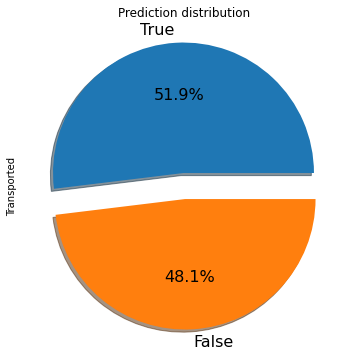

In [107]:
# Sample submission (to get right format)
sub=pd.read_csv('~/ALY6040/github/submission.csv')

# Add predictions
sub['Transported']=preds_tuned

# Replace 0 to False and 1 to True
sub=sub.replace({0:False, 1:True})

# Prediction distribution
plt.figure(figsize=(6,6))
sub['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction distribution")

In [108]:
# Output to csv
sub.to_csv('final_submission.csv', index=False)